# **Questions About Informations**

*   Film dengan score tertinggi?
*   Genre yang paling banyak difilmkan
*   Jumlah film yang dirilis per tahunnya
*   Film dengan pendapatan terbesar?
*   Hubungan antara budget dengan pendapatan?
*   Hal yang mempengaruhi pendapatan?







# **Importing Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv('movies_updated.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"


**Assesing Data**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


In [ ]:
missing_values = movies.isnull().sum()
print(missing_values[missing_values>0])

rating      40
writer       1
star         1
gross      169
company     10
dtype: int64


# **Cleaning Data**

**Check Duplicate**

In [ ]:
# Drop duplikat
movies.duplicated().value_counts()
movies.drop_duplicates(inplace=True)

**Handling Missing Values**

In [ ]:
# Replace missing values in rating and gross with median
movies['gross'] = movies['gross'].fillna(movies['gross'].median())

In [ ]:
# Replace missing value rating with mode
movies['rating'] = movies['rating'].fillna(movies['rating'].mode()[0])
movies['writer'] = movies['writer'].fillna(movies['writer'].mode()[0])
movies['star'] = movies['star'].fillna(movies['star'].mode()[0])
movies['company'] = movies['company'].fillna(movies['company'].mode()[0])

# **EDA**

In [ ]:
movies.describe()

,year,score,votes,budget,gross
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03
mean,1991.191500,6.321950,5.449450e+04,1.542740e+07,4.045943e+07
std,5.934529,0.977101,1.427738e+05,2.248639e+07,9.081659e+07
min,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02
25%,1986.000000,5.700000,4.300000e+03,0.000000e+00,3.096997e+06
50%,1991.000000,6.400000,1.300000e+04,7.000000e+06,1.183822e+07
75%,1996.000000,7.000000,4.500000e+04,2.100000e+07,3.346108e+07
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09


**The most favourite film by votes**

In [ ]:
top10_movies = movies.groupby('name')['score'].mean().sort_values(ascending = False)
top10 = top10_movies.head(10)
top10

,score
name,
The Shawshank Redemption,9.3
Schindler's List,8.9
Pulp Fiction,8.9
Forrest Gump,8.8
Fight Club,8.8
The Lord of the Rings: The Fellowship of the Ring,8.8
The Matrix,8.7
Goodfellas,8.7
Star Wars: Episode V - The Empire Strikes Back,8.7


/tmp/ipython-input-2320838046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


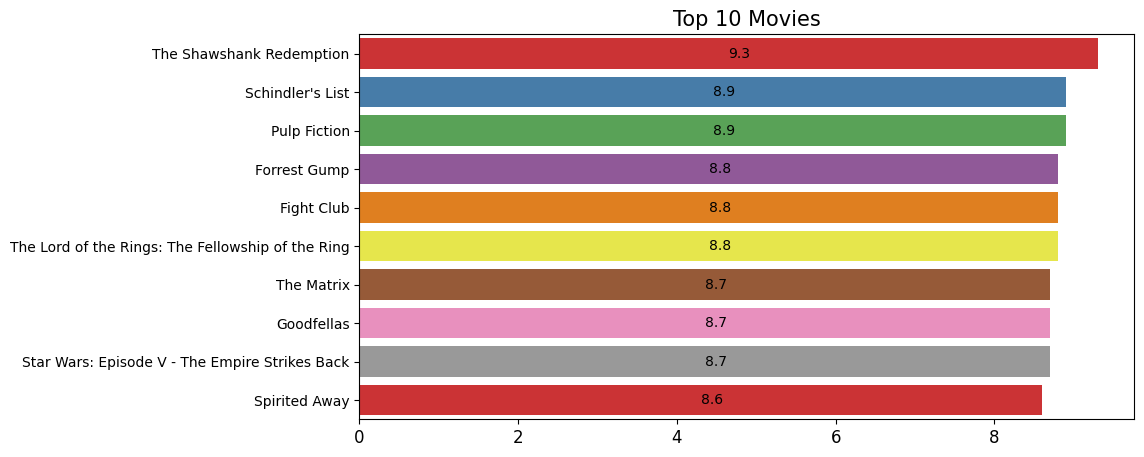

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    y = top10.index,
    x = top10.values,
    palette = sns.color_palette('Set1', 10)
)
plt.title('Top 10 Movies', loc='center', fontsize = 15)
plt.ylabel(None)
plt.xlabel(None)

for i, count in enumerate(top10.values):
    plt.text(count/2, i, count, ha='left', va='center', color='black', fontweight='medium')

plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas diperoleh sepuluh film dengan skor tertinggi dengan "The Shawshank Redemption" yang menduduki peringkat pertama.

**Popular Genre**

In [ ]:
genre_count = movies.groupby('genre')['name'].count().sort_values(ascending=False).head(10)
genre_count

,name
genre,
Comedy,1355
Drama,807
Action,775
Crime,302
Adventure,231
Biography,175
Horror,158
Animation,113
Fantasy,33


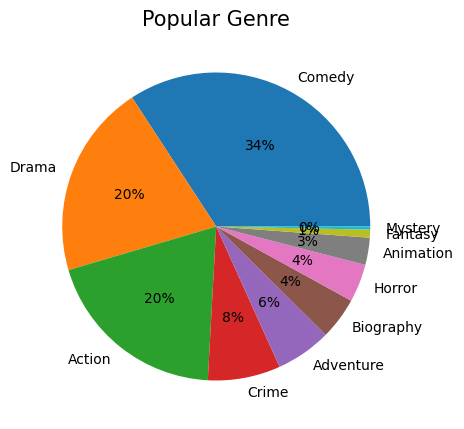

In [ ]:
plt.figure(figsize=(10,5))
sizes = genre_count.values
labels = genre_count.index
plt.pie(
    sizes,
    labels = labels,
    autopct = '%1.0f%%'
)
plt.title('Popular Genre', loc='center', fontsize=15)
plt.show()

Berdasarkan grafik di atas dapat diketahui berapa banyak film dengan variasi genre untuk 10 genre dengan film terbanyak. Dapat dilihat bahwa genre comedy menjadi genre dengan film paling banyak sekitar 34% dari total film.

**The Movies Production Per Year**

In [ ]:
year_movies = movies['year'].value_counts().sort_index().reset_index()
year_movies.columns = ['year', 'count']

/tmp/ipython-input-627325851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Total Movie Production per Year')

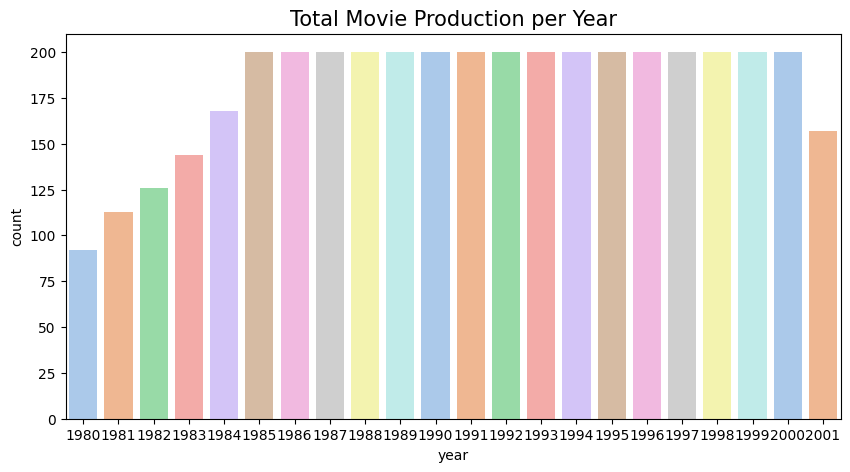

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data = year_movies,
    x = 'year',
    y = 'count',
    palette = 'pastel'
)
plt.title('Total Movie Production per Year', loc='center', fontsize = 15)

**Movies with Bigh Revenues**

In [ ]:
revenues = movies.sort_values(by='gross', ascending=False).reset_index().head(10)
print(revenues[['name', 'gross']])

                                                name         gross
0                                            Titanic  2.201647e+09
1                                      The Lion King  1.083721e+09
2                                      Jurassic Park  1.033928e+09
3          Star Wars: Episode I - The Phantom Menace  1.027083e+09
4              Harry Potter and the Sorcerer's Stone  1.006968e+09
5  The Lord of the Rings: The Fellowship of the Ring  8.976901e+08
6                                   Independence Day  8.174009e+08
7                         E.T. the Extra-Terrestrial  7.929106e+08
8                                       Forrest Gump  6.782261e+08
9                                    The Sixth Sense  6.728063e+08


**Correlation Between Budget and Gross**

In [ ]:
correlation = movies[['gross', 'budget']].corr()
print(correlation)

           gross    budget
gross   1.000000  0.581632
budget  0.581632  1.000000


Berdasarkan hasil korelasi di atas diperoleh bahwa terdapat korelasi sebesar 0.582 yang dapat diartikan bahwa tingginya budget film juga akan memberikan peningkatan pada pendapatan film. Dapat dilihat dari plot di bawah ini bahwa korelasi antara budget dan gross menunjukkan korelasi positif.

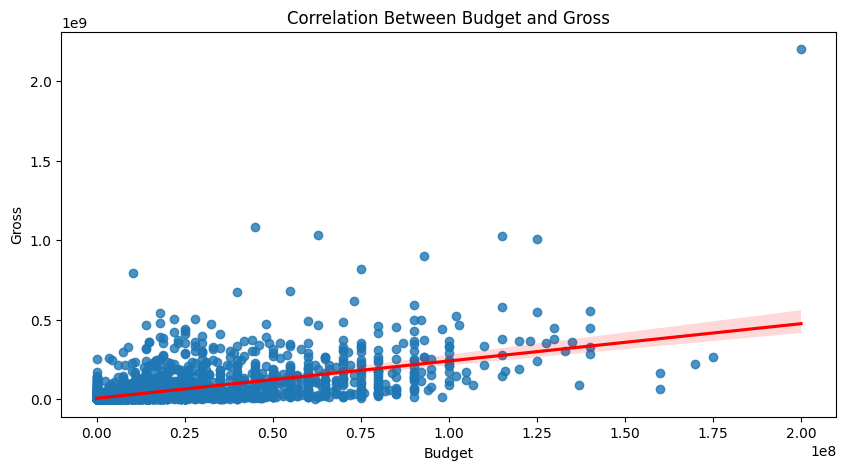

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(data=movies, x='budget', y='gross', line_kws={'color' : 'red'})
plt.title('Correlation Between Budget and Gross')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.show()

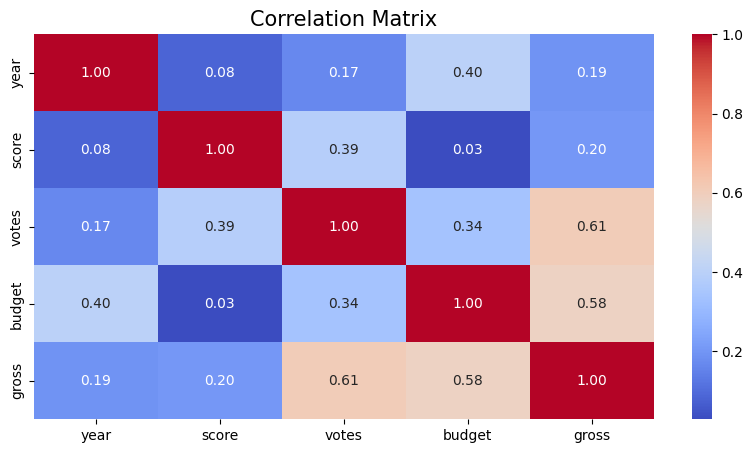

In [ ]:
correlation_matrix = movies.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,5))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm'
)

plt.title('Correlation Matrix', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Visualisasi dari correlation matrix menunjukkan korelas untuk setiap features dalam dataset (numeric only). Untuk setiap features memiliki korelasi positif, namun dapat dilihat korelasi features seperti score dan year hanya memiliki korelasi 0.08 yang mendekati 0 sehingga korelasi yang dimiliki sangat kecil.

In [ ]:
# Change the object/string data type tu numeric
for col in movies.select_dtypes(include=['object']).columns:
    movies[col] = movies[col].astype('category').cat.codes

In [ ]:
movies.corr()['gross'].sort_values(ascending=False)

,gross
gross,1.000000
votes,0.608050
budget,0.581632
score,0.204649
year,0.193741
company,0.164119
country,0.093574
director,0.038667
star,0.023663
released,0.007000


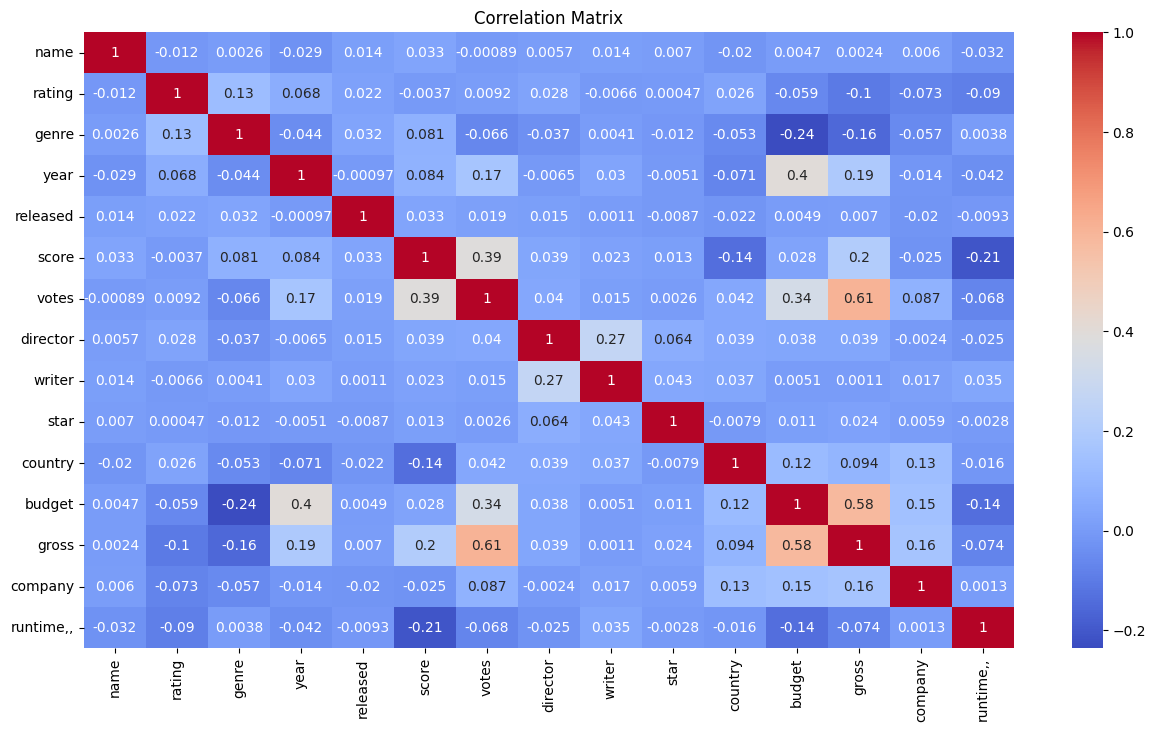

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari visualisasi correlation matrix di atas diperoleh hasil korelasi untuk setiap features dalam movies dataset. Untuk melihat features yang paling berpengaruh terhadap pendapatan film adalah:

*   votes = 0.61
*   budget = 0.582
*   score = 0.205

Lalu juga terdapat features yang berbanding terbalik dengan pendapatan film, yaitu genre.



